# Task [1] - Calculating the Square Root of 2

## Simple calculation using the "**" Operator accurate to 15 decimals

In [1]:
def sqrt2Simp(n):
    # the exponentiation
    # using the exponent (1/2) on a number is the same as getting it's square root
    n  = n**(1/2)
    # printing out 100decimals
    print("{:.100}".format(n))
    # print out normallly
    print(n)
    
sqrt2Simp(2)

1.4142135623730951454746218587388284504413604736328125
1.4142135623730951


## Calculating using the Babylonian Method accurate to 10 decimals

In [2]:
def sqrt2B1(n):
    """
    A function to calculate the square root of a number n.
    """
    r = n
    x = 0
    # setting 10 decimal accurrency
    a = 0.0000000001

    # Loop until we're happy with the accuracy.
    while abs(r - x) > a:
        r = (r + x) / 2
        x = n / r
    print("{:.100}".format(r))
    # Return the (approximate) square root of n.
    return r

sqrt2B1(2)

1.4142135623746898698271934335934929549694061279296875


1.4142135623746899

# Task[2] - Chi-Squared Test

## Contingency Table
***

The table provided for this task is an example of a Contingency Table.[1]

***
- .[1] Contingency Tables, https://en.wikipedia.org/wiki/Contingency_table
***
###### Wikipedia example of Contigency Table 

<img style="float: left;" src="images/ContigencyTable.PNG">




In [3]:
"""
The display of Contingency Table for ease of reading
"""

# Data frames
import pandas as pd 

data = {'': ['White collar', 'Blue collar', 'No collar'],
        'A':[90, 30, 30],
        'B':[60, 50, 40], 
        'C':[104, 51, 45], 
        'D':[95, 20, 35]}

#Setting value to index
df = pd.DataFrame(data).set_index('')

#Total sum per column: 
df.loc['Total']= df.sum(axis=0)

#Total sum per row: 
df['Total'] = df.sum(axis=1)

df

,A,B,C,D,Total
,,,,,
White collar,90,60,104,95,349
Blue collar,30,50,51,20,151
No collar,30,40,45,35,150
Total,150,150,200,150,650


## Calculating the Chi-Square and P values
***
Scipy.stats contains multiple functions to calculate the Chi-Square value.[1]

Do to the fact the table given is an example of a Contingency Table, I thought it appropriate to contingency function chi2_contingency(observed, correction=True, lambda_=None).[2].  Only the observed is needed in this case.

This function returns the test statistic, p-value, degree of freedom and expected frequencies.  Only the first 2 are necessary for this task.


***
- .[1] Documentation for scipy.stats, https://docs.scipy.org/doc/scipy/reference/stats.html  
- .[2] Function for Chi-square test of independence of variables in a contingency table, https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html#scipy.stats.chi2_contingency
***

In [4]:
#Statistics package
import scipy.stats as ss

#Observed Data
obsData = [[90, 30, 30],
         [60, 50, 40],
         [104, 51, 45],
         [95, 20, 35]]

#chi2_contingency - Chi-square test of independence of variables in a contingency table
stat, p, dof, expected  = ss.chi2_contingency(obsData)

print(f"Approximate Chi-squared value: {stat:0.1f}")
print('Actual Chi-squared value:', stat)

print('\nP-Value:', p)
print(f"P_Value: {p:0.2f}")


Approximate Chi-squared value: 24.6
Actual Chi-squared value: 24.571202858582602

P-Value: 0.0004098425861096692
P_Value: 0.00


***
# Task[3] - Excels functions for Standard Deviation

## Setting data sets of Population and Samples
***

### STDEV.P
***

Returns an estimation for the standard deviation of a population, this is when the full data set is known.  An example of this if the data set was a sensis of the entire population of a country.

STDEV.P calculates the standard deviation of a data set, it does this by using the "n" method which is as follows:

<img style="float: left;" src="images/StandardDeviation.gif" width="200" height="100"/>


### STDEV.S
***

Returns an estimation for the standard devaition of a sample, this is when you have part of a data set is known. An example of this would be a survey of set of people in a country, this may be region or other.

STDEV.S uses a similiar formula to the one above but instead of dividing by "N" it divides "N-1".  This is known as "Bessel's Correction".[1]

- .[1] Bessel's Correction, https://en.wikipedia.org/wiki/Bessel%27s_correction


In [5]:
'''
Using numpy to create a random data set for the population.
'''

# Efficient numerical arrays.
import numpy as np

# Setting the mean, standard deviation and size of populaiton
m_a, s_a = 1.0, 0.4
N = 50

# Population data set
a = np.random.normal(m_a, s_a, N)

# Printing the population data set
print("Population A:")
print(a)

Population A:
[ 0.92450245  0.36876364  1.063206    1.36354811  1.42645766  0.80754531
  1.14592149  0.37419126  0.77629003  1.26091681  0.95565847  0.93252932
  0.73168724  0.93678559  0.63423187  0.58085825  0.65876517  0.62035014
  0.73120273  1.29153044  1.06419298  0.7425439  -0.09544081  0.55693081
  0.97112676  1.08407103  0.55273501  0.72232322  0.92731881  1.26472211
  0.9269591   1.51694759  1.25221203  1.08059861  0.76951635  0.77820956
  1.15312428  0.94514075  1.03280497  0.54179947  1.199792    0.83462444
  0.33060415  1.30649933  1.26558905  0.92408166  0.89427538  0.7550916
  1.17100539  1.24888646]


In [6]:
'''
Standard deviation of population using the equivalent of Excels STDEV.P.
'''
# Standard deviation for population
sd = np.std(a)

print(f"Standard Deviation of Population A: {sd:0.4f}")

Standard Deviation of Population A: 0.3167


In [7]:
'''
Getting random sample set from population.
'''

# Setting size of sample
n1 = 30

# Sample data set from poplution
sample_1 = np.random.choice(a, n1, replace=False)

# Printing the sample data set
print("Sample 1:")
print(sample_1)

Sample 1:
[ 1.08059861  1.42645766  1.03280497  1.06419298  0.92450245  1.26558905
  0.7550916   0.95565847  0.55693081 -0.09544081  1.30649933  0.93252932
  0.9269591   1.24888646  0.33060415  0.36876364  1.36354811  1.25221203
  0.73120273  0.89427538  1.08407103  0.92731881  1.14592149  1.51694759
  0.77820956  0.97112676  0.55273501  1.26472211  1.199792    1.063206  ]


In [8]:
'''
Standard deviation of sample 1 using the equivalent of Excels STDEV.P and STDEV.S.
'''

# Standard deviation using STDEV.P
sdp_samp_1 = np.sqrt(np.sum((sample_1 - np.mean(sample_1))**2)/len(sample_1))
# Standard deviation using STDEV.S
sds_samp_1 = np.sqrt(np.sum((sample_1 - np.mean(sample_1))**2)/(len(sample_1)-1))


print("Sample 1:")
print(f"Standard Deviation using STDEV.P: {sdp_samp_1:0.4f}")
print(f"Standard Deviation using STDEV.S: {sds_samp_1:0.4f}")

Sample 1:
Standard Deviation using STDEV.P: 0.3483
Standard Deviation using STDEV.S: 0.3542


In [9]:
'''
Getting second random sample set from population.
'''

# Setting size of sample
n2 = 20

# Sample data set from poplution
sample_2 = np.random.choice(a, n2, replace=False)

# Printing the sample data set
print("Sample 2:")
print(sample_2)

Sample 2:
[0.73168724 0.65876517 1.24888646 1.199792   0.63423187 0.92408166
 1.30649933 1.15312428 0.80754531 1.14592149 1.42645766 0.55693081
 1.25221203 1.08059861 0.93678559 0.94514075 1.06419298 1.063206
 0.55273501 0.76951635]


In [10]:
'''
Standard deviation of sample 2 using the equivalent of Excels STDEV.P and STDEV.S.
'''

# Standard deviation using STDEV.P
sdp_samp_2 = np.sqrt(np.sum((sample_2 - np.mean(sample_2))**2)/len(sample_2))
# Standard deviation using STDEV.S
sds_samp_2 = np.sqrt(np.sum((sample_2 - np.mean(sample_2))**2)/(len(sample_2)-1))

print("Sample 2:")
print(f"Standard Deviation using STDEV.P: {sdp_samp_2:0.4f}")
print(f"Standard Deviation using STDEV.S: {sds_samp_2:0.4f}")  

Sample 2:
Standard Deviation using STDEV.P: 0.2557
Standard Deviation using STDEV.S: 0.2623


### Conclusion
***

In this example, the Standard Deviation of the entire population using STDEV.P is "0.3666".

First sample STDEV.P = "0.3299", STDEV.S = "0.3355".<br>
Second sample STDEV.P = "0.3516", STDEV.S = "0.3607".

In both of these situation using STDEV.S gave us a standard deviation that was closer to the populations true standard deviation.

# Task[4] - Iris data set

In [48]:
# Numerical arrays.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

# Machine learning - kmeans.
import sklearn.cluster as skcl

# Datasets - Iris.
import sklearn.datasets as skds

https://en.wikipedia.org/wiki/Iris_flower_data_set#<br>
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

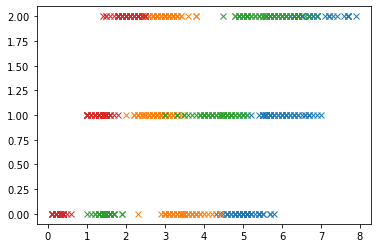

In [143]:
# Iris data set.
iris = skds.load_iris()
iris

dataSet = iris.data
target = iris.target
target_names = iris.target_names

plt.plot(dataSet, target, 'x')

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [144]:
# Perform kmeans fitting.
kmeans = skcl.KMeans(n_clusters=3, random_state=0).fit(dataSet)

In [145]:
# Labels of the point.
labels = kmeans.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [146]:
# Predict the closest cluster each sample in dataSet belongs to.
kmeans.predict([[0, 0, 0, 0], [12, 3, 15, 6]])

array([1, 0])

In [147]:
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

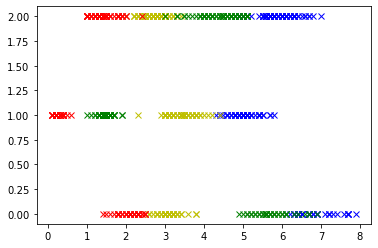

In [148]:
plt.plot(dataSet[:,0], labels, 'bx') # sepal length
plt.plot(dataSet[:,1], labels, 'yx') # sepal width
plt.plot(dataSet[:,2], labels, 'gx') # petal length
plt.plot(dataSet[:,3], labels, 'rx') # petal width

# Data frames
import pandas as pd

df = pd.crosstab(target, klabels)
#df.reindex(columns=[1,2,0])
df
#df.columns


***
# End